# Predicting Customer Satisfaction with Hybrid Basic Filter-Based Feature Selection Method
* **Remove Constant Features**
  1. Remove Constant Features Using Variance Threshold
  2. Remove Constant Features Using Standard Deviation
  3. Remove Constant Features Using Categorical Variables
* **Remove Quasi-Constant Features**
* **Remove Duplicated Features**
* **Stack Feature Selection in a Pipeline**
* **Creating a Random Forest Model Without Using the Hybrid Basic Filter-Based Method**
* **Creating a Random Forest Model Using the Hybrid Basic Filter-Based Method**
* **Creating a Random Forest Model Tuned Without Using the Hybrid Basic Filter-Based Method**


# Business Problem

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

In this notebook, we'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

📌 Here we need to predict the satisfied or dissatisfied customers. Click on this <a href="ttps://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4986/860641/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1709272798&Signature=j81Ef2xPn%2BsP5cxBwAlKZJMeS6MWCINpRddVbolUt5Seva%2FyuAUtDgymXNB%2BTwsYPUnvEZzGRukhiIaC5PWoFZeX6b6cN02hLbNDFlq0gTQ1kDl7%2F4%2BawaqAUXBUacMameHUtmXW0q86d1Yd%2FPT2YxrEwSUXP2mOUsV1oZPBfaqCgAa%2BHITcTTZxwCX3Af8wFT5v3dYXeRNacEzjghRLvL0t1crRQCCOHVHGBjua5rOVSzyhOb%2BwusJzLYD2dusKX%2FT%2FfNiwLCom2B1Zkq7P4V%2B9PCFgdpIE86Ut%2F6Lt7Rf%2Btn2VRZyO%2BBNjIUU6H6CaWTybXnRezijppQzfyGDoOg%3D%3D&response-content-disposition=attachment%3B+filename%3Dsantander-customer-satisfaction.zip">link</a> to review the data set and variables.

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/FS/santander-customer-satisfaction.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

# General Information About to the Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

######################### Head #########################
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  \
0   1     2     23              0.0000                   0.0000                   0.0000                   0.0000                   0.0000                   0.0000                   0.0000             0.0000                   0.0000                   0.0000                   0.0000                   0.0000             0.0000                   0.0000                   0.0000             0.0000              0.0000           0         0         

# Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 76020
Variables: 371
Cat_cols: 238
Num_cols: 133
Cat_but_car: 0
num_but_cat: 238


# Remove Constant Features

Constant features are features in a dataset that have the same value for all observations. In other words, these features have zero variance. Constant features do not provide any useful information for learning models and often introduce unnecessary noise. Therefore, removing constant features can improve model performance and reduce computational overhead. Identifying and removing constant features is particularly important in large-scale datasets as these features can negatively impact model performance.

# Remove Constant Features Using Variance Threshold

In [ ]:
def remove_constant_features_variance_threshold(dataset, drop_labels, target, threshold=0):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using VarianceThreshold
  selected_feature = VarianceThreshold(threshold=threshold)
  selected_feature.fit(X)
  print("Non-Constant Features: ", sum(selected_feature.get_support()))
  constant = X.columns[~selected_feature.get_support()]
  print("Constant Features: ", len(constant))
  feature_names = X.columns[selected_feature.get_support()]
  X = selected_feature.transform(X)
  X = pd.DataFrame(X, columns=feature_names)
  return X

In [ ]:
X = remove_constant_features_variance_threshold(df, drop_labels=["ID", "TARGET"], target=["TARGET"])

Non-Constant Features:  335
Constant Features:  34


# Remove Constant Features Using Standard Deviation

In [ ]:
def remove_constant_features_std(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_constant_features_std(df, drop_labels=["TARGET", "ID"], target=["TARGET"])

Constant Features:  34
Non-Constant Features:  335


In [ ]:
def remove_constant_features_categorical(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Categorical Variables
  constant_features = [feature for feature in X.columns if X[feature].nunique() == 1]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].nunique() > 1]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_constant_features_categorical(df, drop_labels=["TARGET", "ID"], target=["TARGET"])

Constant Features:  34
Non-Constant Features:  335


# Remove Quasi-Constant Features

Quasi-constant features are features in a dataset that have mostly the same value, but they are not entirely constant. In other words, these features have a high percentage of observations with the same value, but there are also some rare cases where the value differs. Quasi-constant features typically introduce unnecessary noise during model training and can negatively impact model performance. Therefore, identifying and removing quasi-constant features is important for improving model performance and reducing redundant information.

In [ ]:
def remove_quasi_constant_features(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Non Quasi-Constant Features: ", len(non_quasi_constant_features))
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_quasi_constant_features(df, drop_labels=["TARGET", "ID"], target=["TARGET"])

Non Quasi-Constant Features:  192
Quasi-Constant Features:  177


# Remove Duplicated Features

Duplicated features are features within a dataset that contain the same or nearly identical information. These features add unnecessary redundancy and complexity during model training, often resulting in increased computational costs. Duplicated features can degrade model performance and lead to unnecessary computational overhead. Therefore, it is important to remove or process them from the dataset.

In [ ]:
def remove_duplicated_features(dataset, drop_labels, target, report_duplicated_feature_pairs=False):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using own function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("Non-Duplicated Features: ", len(non_duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  if report_duplicated_feature_pairs:
    print(50*"#")
    for feature in duplicated_feature_pairs.keys():
      if len(duplicated_feature_pairs[feature]) > 0:
        print(feature, duplicated_feature_pairs[feature])
  return X

In [ ]:
X = remove_duplicated_features(df, drop_labels=["TARGET", "ID"], target=["TARGET"], report_duplicated_feature_pairs=True)

Duplicated Features:  62
Non-Duplicated Features:  307
##################################################
ind_var2_0 ['ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']
ind_var6_0 ['ind_var29_0']
ind_var6 ['ind_var29']
ind_var13_medio_0 ['ind_var13_medio']
ind_var18_0 ['ind_var18']
ind_var26_0 ['ind_var26']
ind_var25_0 ['ind_var25']
ind_var32_0 ['ind_var32']
ind_var34_0 ['ind_var34']
ind_var37_0 ['ind_var37']
ind_var40 ['ind_va

# Stack Feature Selection in a Pipeline

In [ ]:
def basic_feature_selection_pipeline(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("All Features For Train: ", len(non_duplicated_features))
  X_train = X[duplicated_feature_pairs.keys()]

  return X

In [ ]:
X = basic_feature_selection_pipeline(df, drop_labels=["TARGET", "ID"], target=["TARGET"])

Constant Features:  34
Quasi-Constant Features:  143
Duplicated Features:  8
All Features For Train:  184


# Creating a Random Forest Model Without Using the Hybrid Basic Filter-Based Method

In [ ]:
def RF_Model_Without_FS(dataframe, drop_labels, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
    start_time = time.time()
    # Load Dataset
    y = dataframe[target]
    X = dataframe.drop(labels=drop_labels, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    rf_model = RandomForestClassifier().fit(X_train, y_train)

    if results:
        acc_train = accuracy_score(y_train, rf_model.predict(X_train))
        acc_test = accuracy_score(y_test, rf_model.predict(X_test))
        r2 = rf_model.score(X, y)
        r2_train = rf_model.score(X_train, y_train)
        r2_test = rf_model.score(X_test, y_test)
        cv_train = cross_val_score(rf_model, X_train, y_train, cv=cv).mean()
        cv_test = cross_val_score(rf_model, X_test, y_test, cv=cv).mean()
        print("##################### Accuracy & R2 Metrics ######################")
        print("Accuracy_train: ", "%.3f" % acc_train)
        print("Accuracy_test: ", "%.3f" % acc_test)
        print("R2: ", "%.3f" % r2)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print("Cross Validation Score(Train): ", "%.3f" % cv_train)
        print("Cross Validation Score(Test): ", "%.3f" % cv_test)

    if conf_matrix:
        print("##################### Confusion Matrix(Train) ######################")
        cm_train = confusion_matrix(y_train, rf_model.predict(X_train))
        print(cm_train)
        print("##################### Confusion Matrix(Test) ######################")
        cm_test = confusion_matrix(y_test, rf_model.predict(X_test))
        print(cm_test)

        # Plot confusion matrix
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
        axs[0].set_title("Confusion Matrix (Train)")
        sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
        axs[1].set_title("Confusion Matrix (Test)")
        plt.show()

    if c_report:
        print("###################### Classification Report(Train) ######################")
        print(classification_report(y_train, rf_model.predict(X_train)))
        print("###################### Classification Report(Test) ######################")
        print(classification_report(y_test, rf_model.predict(X_test)))

    if roc:
        print("###################### Roc Auc Score(Train) ######################")
        rf_roc_auc_train = roc_auc_score(y_train, rf_model.predict(X_train))
        print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])

        print("###################### Roc Auc Score(Test) ######################")
        rf_roc_auc_test = roc_auc_score(y_test, rf_model.predict(X_test))
        print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

        # Plot ROC curves
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].plot(fpr_train, tpr_train, label='AUC (area = %.3f)' % rf_roc_auc_train)
        axs[0].plot([0, 1], [0, 1], 'r--')
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel('False Positive Ratio')
        axs[0].set_ylabel('True Positive Ratio')
        axs[0].set_title('ROC (Train)')

        axs[1].plot(fpr_test, tpr_test, label='AUC (area = %.3f)' % rf_roc_auc_test)
        axs[1].plot([0, 1], [0, 1], 'r--')
        axs[1].set_xlim([0.0, 1.0])
        axs[1].set_ylim([0.0, 1.05])
        axs[1].set_xlabel('False Positive Ratio')
        axs[1].set_ylabel('True Positive Ratio')
        axs[1].set_title('ROC (Test)')

        plt.legend(loc="lower right")
        plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Function execution time: {minutes} minutes {seconds} seconds")

    return rf_model


##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.996
Accuracy_test:  0.954
R2:  0.983
R2_train:  0.996
R2_test:  0.954
Cross Validation Score(Train):  0.952
Cross Validation Score(Test):  0.956
##################### Confusion Matrix(Train) ######################
[[51085     7]
 [  209  1913]]
##################### Confusion Matrix(Test) ######################
[[21696   224]
 [  836    50]]


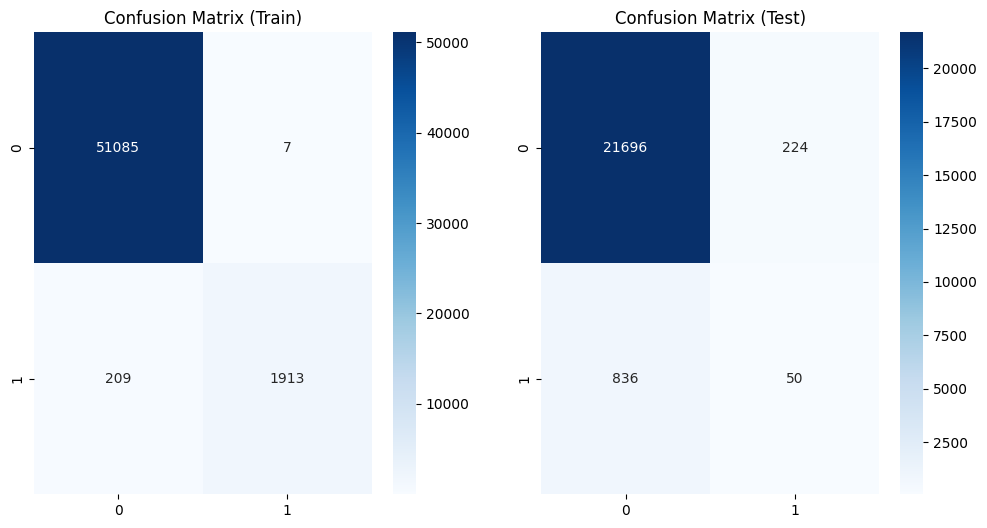

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51092
           1       1.00      0.90      0.95      2122

    accuracy                           1.00     53214
   macro avg       1.00      0.95      0.97     53214
weighted avg       1.00      1.00      1.00     53214

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21920
           1       0.18      0.06      0.09       886

    accuracy                           0.95     22806
   macro avg       0.57      0.52      0.53     22806
weighted avg       0.93      0.95      0.94     22806

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  0.951
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.523


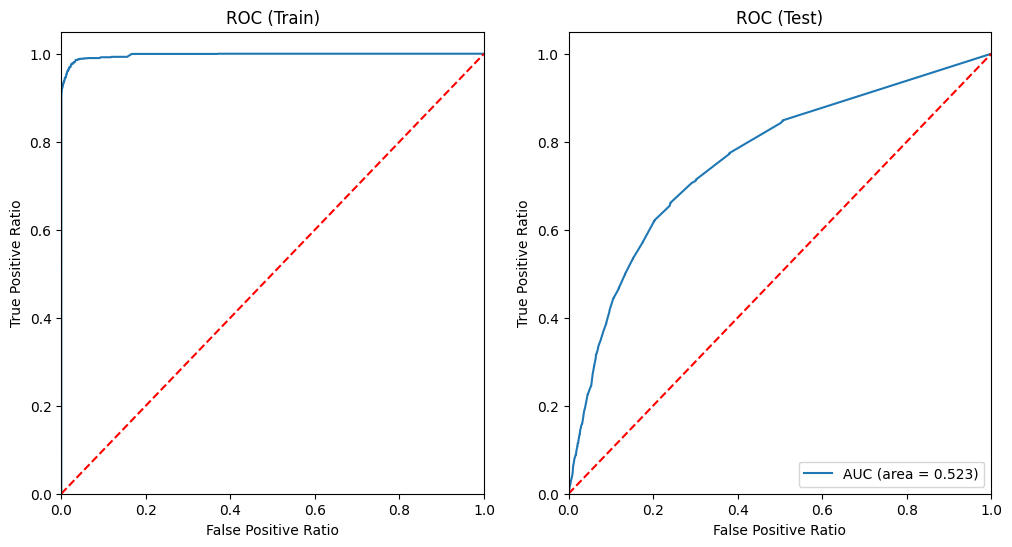

Function execution time: 4 minutes 38 seconds


In [ ]:
rf_model = RF_Model_Without_FS(df, drop_labels=["TARGET", "ID"], target="TARGET", results=True, conf_matrix=True, c_report=True, roc=True)

# Creating a Random Forest Model Using the Hybrid Basic Filter-Based Method

In [ ]:
def RF_Model_With_FS(dataframe, drop_labels, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
    start_time = time.time()
    # Load Dataset
    y = dataframe[target]
    X = basic_feature_selection_pipeline(dataframe, drop_labels=drop_labels, target=target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    rf_model = RandomForestClassifier().fit(X_train, y_train)

    if results:
        acc_train = accuracy_score(y_train, rf_model.predict(X_train))
        acc_test = accuracy_score(y_test, rf_model.predict(X_test))
        r2 = rf_model.score(X, y)
        r2_train = rf_model.score(X_train, y_train)
        r2_test = rf_model.score(X_test, y_test)
        cv_train = cross_val_score(rf_model, X_train, y_train, cv=cv).mean()
        cv_test = cross_val_score(rf_model, X_test, y_test, cv=cv).mean()
        print("##################### Accuracy & R2 Metrics ######################")
        print("Accuracy_train: ", "%.3f" % acc_train)
        print("Accuracy_test: ", "%.3f" % acc_test)
        print("R2: ", "%.3f" % r2)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print("Cross Validation Score(Train): ", "%.3f" % cv_train)
        print("Cross Validation Score(Test): ", "%.3f" % cv_test)

    if conf_matrix:
        print("##################### Confusion Matrix(Train) ######################")
        cm_train = confusion_matrix(y_train, rf_model.predict(X_train))
        print(cm_train)
        print("##################### Confusion Matrix(Test) ######################")
        cm_test = confusion_matrix(y_test, rf_model.predict(X_test))
        print(cm_test)

        # Plot confusion matrix
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
        axs[0].set_title("Confusion Matrix (Train)")
        sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
        axs[1].set_title("Confusion Matrix (Test)")
        plt.show()

    if c_report:
        print("###################### Classification Report(Train) ######################")
        print(classification_report(y_train, rf_model.predict(X_train)))
        print("###################### Classification Report(Test) ######################")
        print(classification_report(y_test, rf_model.predict(X_test)))

    if roc:
        print("###################### Roc Auc Score(Train) ######################")
        rf_roc_auc_train = roc_auc_score(y_train, rf_model.predict(X_train))
        print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])

        print("###################### Roc Auc Score(Test) ######################")
        rf_roc_auc_test = roc_auc_score(y_test, rf_model.predict(X_test))
        print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

        # Plot ROC curves
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].plot(fpr_train, tpr_train, label='AUC (area = %.3f)' % rf_roc_auc_train)
        axs[0].plot([0, 1], [0, 1], 'r--')
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel('False Positive Ratio')
        axs[0].set_ylabel('True Positive Ratio')
        axs[0].set_title('ROC (Train)')

        axs[1].plot(fpr_test, tpr_test, label='AUC (area = %.3f)' % rf_roc_auc_test)
        axs[1].plot([0, 1], [0, 1], 'r--')
        axs[1].set_xlim([0.0, 1.0])
        axs[1].set_ylim([0.0, 1.05])
        axs[1].set_xlabel('False Positive Ratio')
        axs[1].set_ylabel('True Positive Ratio')
        axs[1].set_title('ROC (Test)')

        plt.legend(loc="lower right")
        plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Function execution time: {minutes} minutes {seconds} seconds")

    return rf_model

Constant Features:  34
Quasi-Constant Features:  143
Duplicated Features:  8
All Features For Train:  184
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.996
Accuracy_test:  0.954
R2:  0.983
R2_train:  0.996
R2_test:  0.954
Cross Validation Score(Train):  0.952
Cross Validation Score(Test):  0.956
##################### Confusion Matrix(Train) ######################
[[51082    10]
 [  207  1915]]
##################### Confusion Matrix(Test) ######################
[[21706   214]
 [  838    48]]


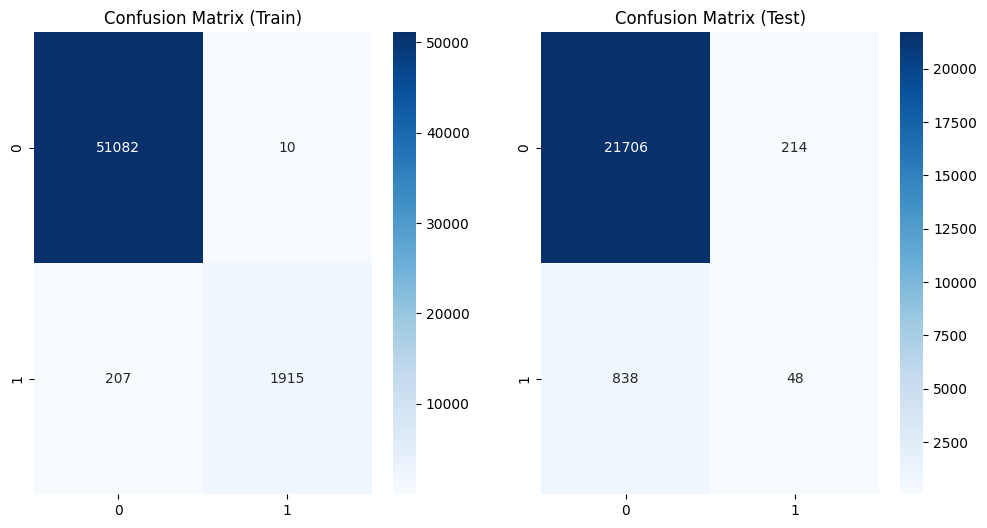

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51092
           1       0.99      0.90      0.95      2122

    accuracy                           1.00     53214
   macro avg       1.00      0.95      0.97     53214
weighted avg       1.00      1.00      1.00     53214

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21920
           1       0.18      0.05      0.08       886

    accuracy                           0.95     22806
   macro avg       0.57      0.52      0.53     22806
weighted avg       0.93      0.95      0.94     22806

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  0.951
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.522


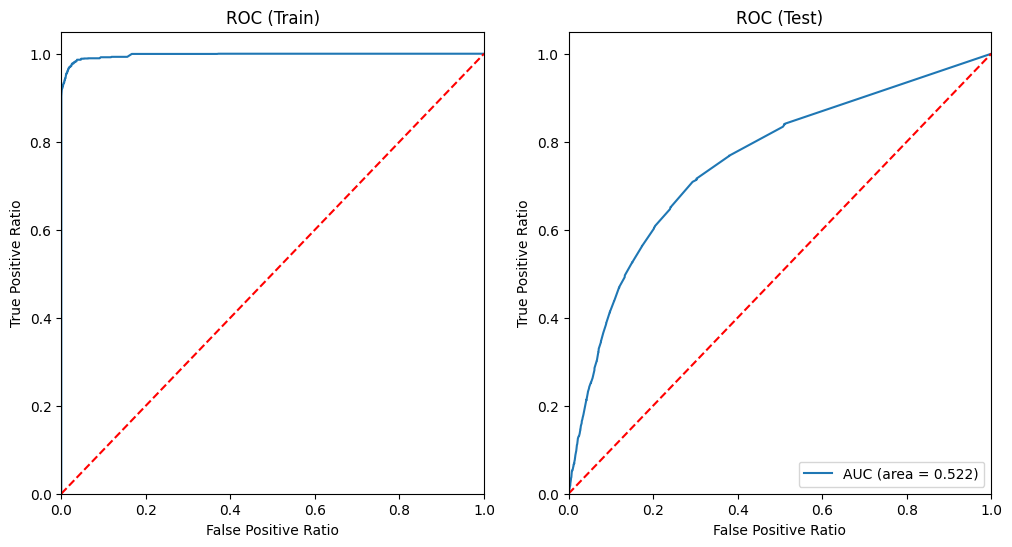

Function execution time: 3 minutes 43 seconds


In [ ]:
rf_model = RF_Model_With_FS(df, drop_labels=["TARGET", "ID"], target="TARGET", results=True, conf_matrix=True, c_report=True, roc=True)

# Creating a Random Forest Model Tuned Using the Hybrid Basic Filter-Based Method

In [ ]:
def RF_Model_Tuned_With_FS(dataframe, drop_labels, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
    start_time = time.time()
    # Load Dataset
    y = dataframe[target]
    X = basic_feature_selection_pipeline(dataframe, drop_labels=drop_labels, target=target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    rf_model = RandomForestClassifier().fit(X_train, y_train)
    rf_model_params = {"max_depth": [2,5,8,10],
                      "max_features": [2,5,8],
                      "n_estimators": [500,1000],
                      "min_samples_split": [5,10]}
    rf_cv_model = GridSearchCV(rf_model, rf_model_params, cv=cv).fit(X_train, y_train)
    rf_model_tuned = RandomForestClassifier(max_depth=rf_cv_model.best_params_["max_depth"],
                                            max_features=rf_cv_model.best_params_["max_features"],
                                            n_estimators=rf_cv_model.best_params_["n_estimators"],
                                            min_samples_split=rf_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)


    if results:
        acc_train = accuracy_score(y_train, rf_model_tuned.predict(X_train))
        acc_test = accuracy_score(y_test, rf_model_tuned.predict(X_test))
        r2 = rf_model.score(X, y)
        r2_train = rf_model.score(X_train, y_train)
        r2_test = rf_model.score(X_test, y_test)
        cv_train = cross_val_score(rf_model_tuned, X_train, y_train, cv=cv).mean()
        cv_test = cross_val_score(rf_model_tuned, X_test, y_test, cv=cv).mean()
        print("##################### Accuracy & R2 Metrics ######################")
        print("Accuracy_train: ", "%.3f" % acc_train)
        print("Accuracy_test: ", "%.3f" % acc_test)
        print("R2: ", "%.3f" % r2)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print("Cross Validation Score(Train): ", "%.3f" % cv_train)
        print("Cross Validation Score(Test): ", "%.3f" % cv_test)

    if conf_matrix:
        print("##################### Confusion Matrix(Train) ######################")
        cm_train = confusion_matrix(y_train, rf_model_tuned.predict(X_train))
        print(cm_train)
        print("##################### Confusion Matrix(Test) ######################")
        cm_test = confusion_matrix(y_test, rf_model_tuned.predict(X_test))
        print(cm_test)

        # Plot confusion matrix
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
        axs[0].set_title("Confusion Matrix (Train)")
        sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
        axs[1].set_title("Confusion Matrix (Test)")
        plt.show()

    if c_report:
        print("###################### Classification Report(Train) ######################")
        print(classification_report(y_train, rf_model_tuned.predict(X_train)))
        print("###################### Classification Report(Test) ######################")
        print(classification_report(y_test, rf_model_tuned.predict(X_test)))

    if roc:
        print("###################### Roc Auc Score(Train) ######################")
        rf_roc_auc_train = roc_auc_score(y_train, rf_model_tuned.predict(X_train))
        print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_model_tuned.predict_proba(X_train)[:,1])

        print("###################### Roc Auc Score(Test) ######################")
        rf_roc_auc_test = roc_auc_score(y_test, rf_model_tuned.predict(X_test))
        print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_model_tuned.predict_proba(X_test)[:,1])

        # Plot ROC curves
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].plot(fpr_train, tpr_train, label='AUC (area = %.3f)' % rf_roc_auc_train)
        axs[0].plot([0, 1], [0, 1], 'r--')
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel('False Positive Ratio')
        axs[0].set_ylabel('True Positive Ratio')
        axs[0].set_title('ROC (Train)')

        axs[1].plot(fpr_test, tpr_test, label='AUC (area = %.3f)' % rf_roc_auc_test)
        axs[1].plot([0, 1], [0, 1], 'r--')
        axs[1].set_xlim([0.0, 1.0])
        axs[1].set_ylim([0.0, 1.05])
        axs[1].set_xlabel('False Positive Ratio')
        axs[1].set_ylabel('True Positive Ratio')
        axs[1].set_title('ROC (Test)')

        plt.legend(loc="lower right")
        plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Function execution time: {minutes} minutes {seconds} seconds")

    return rf_model_tuned

Constant Features:  34
Quasi-Constant Features:  143
Duplicated Features:  8
All Features For Train:  184
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.961
Accuracy_test:  0.961
R2:  0.983
R2_train:  0.996
R2_test:  0.953
Cross Validation Score(Train):  0.960
Cross Validation Score(Test):  0.961
##################### Confusion Matrix(Train) ######################
[[51092     0]
 [ 2100    22]]
##################### Confusion Matrix(Test) ######################
[[21920     0]
 [  886     0]]


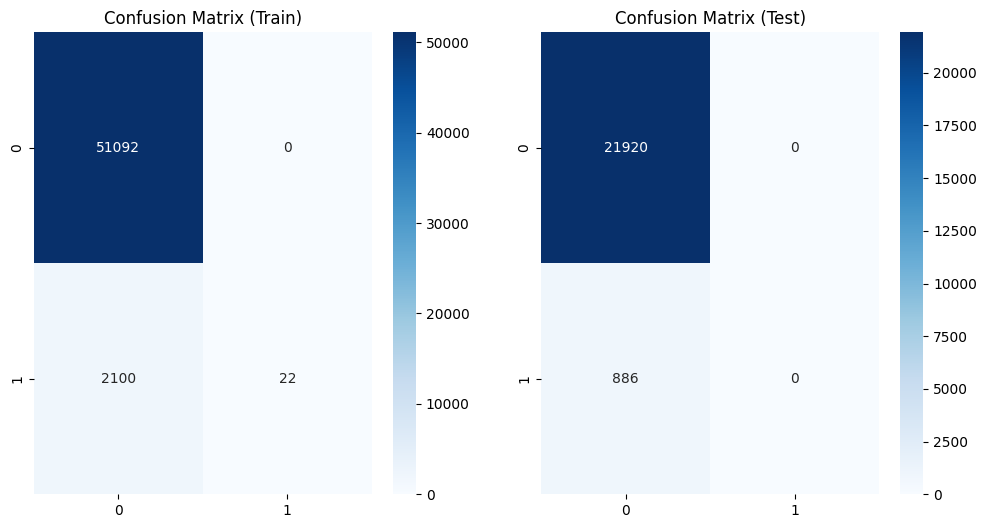

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     51092
           1       1.00      0.01      0.02      2122

    accuracy                           0.96     53214
   macro avg       0.98      0.51      0.50     53214
weighted avg       0.96      0.96      0.94     53214

###################### Classification Report(Test) ######################


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.00      0.00      0.00       886

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  0.505
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.500


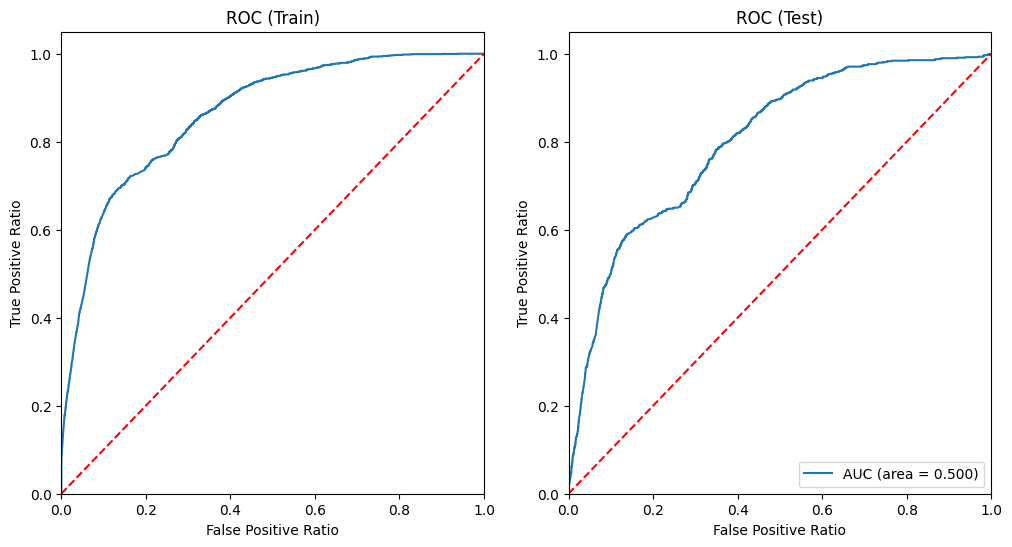

Function execution time: 130 minutes 55 seconds


In [ ]:
rf_model_tuned = RF_Model_Tuned_With_FS(df, drop_labels=["TARGET", "ID"], target="TARGET", results=True, conf_matrix=True, c_report=True, roc=True)